# Ford GoBike - Data Analysis and Visualization

## By: Anita Maskara

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommendations">Recommendations</a></li>   
</ul>

<a id='intro'></a>
## Introduction

Bay Wheels offers all residents of the Bay Area an affordable, accessible and fun new transportation option. Bikes available 24/7/365 in San Francisco, Oakland, Berkeley, Emeryville and San Jose. One-time \\$5 Annual Membership (\\$5/month in second year). Membership includes first 60 minutes of each trip.Rides longer than 60 minutes will result in additional fees of $3 for each additional 15 minutes or potential account suspension.

The data is available at <a href="https://s3.amazonaws.com/baywheels-data/index.html"> https://s3.amazonaws.com/baywheels-data/index.html</a>

The dataset includes data for the year 2018. It has $1863721 $ rows and $16$ columns

__<a href='#data-exploration'>Data Exploration</a>__

The analysis uses the data pertaining to trips on Ford GoBike for the year 2018. The major aim is to understand the following.

- <a href = "#q1">Q1. Growth pattern in 2018 </a>   

- <a href = "#q2">Q2. Analysis of number of rides by subscribers vs customers during weekdays and weekends </a>   
    
- <a href = "#q3">Q3. Trend in number of rides by subscribers across different age groups</a>       
- <a href = "#q4">Q4. Average trip duration and average distance of subscribers vs customers </a>  
- <a href = "#q5">Q5. Bike rentals analyzed by age group,day of week, hour of day </a>


<a id='wrangling'></a>
## Data Wrangling

### Setup

In [112]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set_context("talk")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Gathering data

import os
import glob
#set working directory
os.chdir(r"C:\Users\aabha.DESKTOP-HG6KK17\Downloads\2018-fordgobike-tripdata")

# find all csv files in the folder
# use glob pattern matching -> extension = 'csv'
# save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
# export to csv
combined_csv.to_csv('2018FordGoBike.csv', index = False, encoding = 'utf-8')

In [165]:
# load in the dataset into a pandas dataframe
df_2018 = pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Downloads\\2018-fordgobike-tripdata\\2018FordGoBike.csv')

In [166]:
# high-level overview of data shape and composition

# The number of rows and columns in df
df_2018.shape

(1863721, 16)

In [167]:
# checking the datatypes of the columns
dtype_df = {}
values = []
dtypes = []

for column in df.columns:
    value = df[column].head(1).values[0]
    dtype = df[column].head(1).dtype
    values.append(value)
    dtypes.append(dtype)

dtype_df = pd.DataFrame({'column_name':df.columns, 
                        'value':values,
                        'dtype':dtypes})

dtype_df

,column_name,dtype,value
0,duration_sec,int64,75284
1,start_time,datetime64[ns],2018-01-31T22:52:35.239000000
2,end_time,datetime64[ns],2018-02-01T19:47:19.824000000
3,start_station_id,float64,120
4,start_station_name,object,Mission Dolores Park
5,start_station_latitude,float64,37.7614
6,start_station_longitude,float64,-122.426
7,end_station_id,float64,285
8,end_station_name,object,Webster St at O'Farrell St
9,end_station_latitude,float64,37.7835


**The Data**

Each trip is anonymized and includes:

Trip Duration (seconds)<br>
Start Time and Date<br>
End Time and Date<br>
Start Station ID<br>
Start Station Name<br>
Start Station Latitude<br>
Start Station Longitude<br>
End Station ID<br>
End Station Name<br>
End Station Latitude<br>
End Station Longitude<br>
Bike ID<br>
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>
Member Year of Birth<br>
Member Gender
Bike share for all

'Bike share for all' is a program which is offered by Ford goBike to sponsor low income people who meet certain criteria. Bike Share for All is available to Bay Area residents ages 18 and older who qualify for Calfresh, SFMTA (Low Income) Lifeline Passes or PG&E CARE utility discount. 

In [168]:
df_2018.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Assessing data

### What is the structure of the dataset?

There are 18,63,721 records of bike rentals in the dataset with 16 features as explained above. Some variables are of numeric type while some are of object datatype. 

### What is/are the main feature(s) of interest in your dataset?

The primary aim is to find when has the most number of trips been taken, whether average duration for subscriber differs from customer, if so then what would this difference mean to us? Hence, duration_sec and user_type seems to be a good start. I would also like to evaluate which route is most used for the company. 

I am interested in exploring the dataset to understand the users' behavior patterns and personal details like:

- Average riding duration for subscriber vs customer
- Average riding distance for subscriber vs customer
- Age groups of users
- Genders
- Weekly day distribution

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that start_time will have the strongest effect on the number of bike rentals: the rentals will be higher during peak travel hours on weekdays in the morning and in the evening. I also think that people in 20's and 30's ride more. As age increases, number of bike rentals decreases.

As previously mentioned , Our main feature would be

Station start, duration_sec, Station end, User_type

From sales perspective ,

Member_gender, Member_birth_year

In [169]:
df_2018.describe(include = 'all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,1.863721e+06,1863721,1863721,1.851950e+06,1851950,1.863721e+06,1.863721e+06,1.851950e+06,1851950,1.863721e+06,1.863721e+06,1.863721e+06,1863721,1.753003e+06,1753354,1863721
unique,NaN,1863584,1863610,NaN,348,NaN,NaN,NaN,348,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2018-07-04 13:56:56.6540,2018-06-19 09:20:52.0510,NaN,San Francisco Ferry Building (Harry Bridges Pl...,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,38461,NaN,NaN,NaN,50000,NaN,NaN,NaN,1583554,NaN,1288085,1701386
mean,8.573026e+02,NaN,NaN,1.196744e+02,NaN,3.776678e+01,-1.223492e+02,1.181730e+02,NaN,3.776690e+01,-1.223487e+02,2.296851e+03,NaN,1.983088e+03,NaN,NaN
std,2.370379e+03,NaN,NaN,1.003976e+02,NaN,1.057689e-01,1.654634e-01,1.004403e+02,NaN,1.056483e-01,1.650597e-01,1.287733e+03,NaN,1.044289e+01,NaN,NaN
min,6.100000e+01,NaN,NaN,3.000000e+00,NaN,3.726331e+01,-1.224737e+02,3.000000e+00,NaN,3.726331e+01,-1.224737e+02,1.100000e+01,NaN,1.881000e+03,NaN,NaN
25%,3.500000e+02,NaN,NaN,3.300000e+01,NaN,3.777106e+01,-1.224114e+02,3.000000e+01,NaN,3.777106e+01,-1.224094e+02,1.225000e+03,NaN,1.978000e+03,NaN,NaN
50%,5.560000e+02,NaN,NaN,8.900000e+01,NaN,3.778107e+01,-1.223974e+02,8.800000e+01,NaN,3.778127e+01,-1.223971e+02,2.338000e+03,NaN,1.985000e+03,NaN,NaN
75%,8.720000e+02,NaN,NaN,1.860000e+02,NaN,3.779625e+01,-1.222865e+02,1.830000e+02,NaN,3.779728e+01,-1.222894e+02,3.333000e+03,NaN,1.991000e+03,NaN,NaN


In [170]:
# creating a copy of dataset
df = df_2018.copy()

The datatype of all variables seem to be correct except for the following:

`end_time`, `start_time` should be of datetime datatype

`member_gender`, `user_type` can be converted into categorical datatype

#### Check for duplicate records 

In [171]:
# Checking for duplicate records
sum(df.duplicated())

0

#### Checking for missing data

We can use seaborn to create a simple heatmap to see where and how much data we are missing!

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [173]:
na_percent = df.isna().sum()/df.shape[0]
na_percent.sort_values(ascending=False)

member_birth_year          0.059407
member_gender              0.059219
end_station_name           0.006316
end_station_id             0.006316
start_station_name         0.006316
start_station_id           0.006316
bike_share_for_all_trip    0.000000
user_type                  0.000000
bike_id                    0.000000
end_station_longitude      0.000000
end_station_latitude       0.000000
start_station_longitude    0.000000
start_station_latitude     0.000000
end_time                   0.000000
start_time                 0.000000
duration_sec               0.000000
dtype: float64

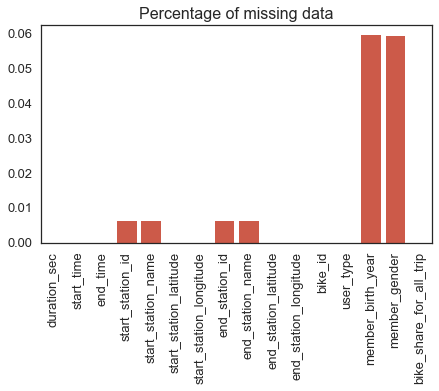

In [174]:
plt.figure(figsize=(7,4))
na_percent = df.isna().sum()/df.shape[0]
base_color = sns.color_palette()[0]
sns.barplot(na_percent.index.values, na_percent, color = base_color)
plt.xticks(rotation = 90)
plt.title('Percentage of missing data', fontsize=16);

0.004939 percent of data is missing values in start_station_name, start_station_id, end_station_name, end_station_id. We will drop these rows.

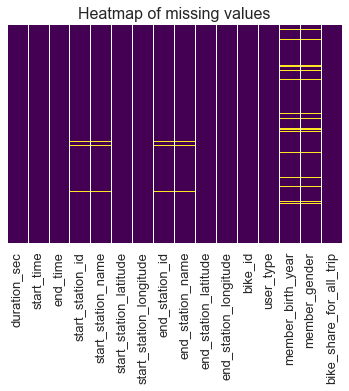

In [175]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Heatmap of missing values', fontsize=16);

### Cleaning data

In [176]:
# dropping rows that have missing values in `start_station_id` as these might be cancelled trips
df = df[pd.notnull(df['start_station_id'])]

In [177]:
df.shape

(1851950, 16)

In [178]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110394
member_gender              110043
bike_share_for_all_trip         0
dtype: int64

In [179]:
df = df.dropna()

In [180]:
df.shape

(1741556, 16)

<a id='eda'></a>
## Exploratory Data Analysis

<a id="new_variables"></a>
### Feature Engineering

**Define**

Convert duration_sec from seconds to minutes

**Code**

In [181]:
df['duration_min']=df['duration_sec']/60

In [182]:
print('average duration in minutes:') 
print(round(df['duration_min'].mean(),3))

print('minimum duration in minutes:')
print(round(df['duration_min'].min(),3))

print('maximum duration in minutes:')
print(round(df['duration_min'].max(),3))


average duration in minutes:
12.881
minimum duration in minutes:
1.017
maximum duration in minutes:
1438.017


**Test**

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 17 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
duration_min               float64
dtypes: float64(8), int64(2), object(7)
memory usage: 239.2+ MB


**Define**

Convert start_station_id, end_station_id, member_birth_year to integer types

**Code**

In [184]:
df['start_station_id'] = df['start_station_id'].astype(int)

In [185]:
df['end_station_id'] = df['end_station_id'].astype(int)

In [186]:
df['member_birth_year']=df['member_birth_year'].astype(int)

**Test**

In [187]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int32
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int32
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int32
member_gender               object
bike_share_for_all_trip     object
duration_min               float64
dtype: object

**Define**

Calculate age from member_birth_year

**Code**

In [188]:
df['age'] = 2019-df['member_birth_year']

In [189]:
df['age'].sample(10)

1478362    31
423204     41
410674     56
1377153    38
974363     40
1446349    55
1672942    38
1214528    45
1834966    42
354061     29
Name: age, dtype: int32

In [190]:
print('maximum age:')
print(df['age'].max())

maximum age:
138


There appear to be some outliers in age variable. 

In [191]:
print('median age is: ') 
print(df['age'].median())

print('avg age is:')
print(round(df['age'].mean(),2))

median age is: 
34.0
avg age is:
35.94


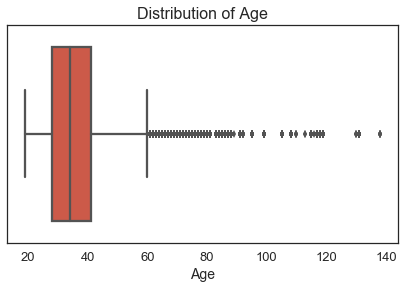

In [192]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='age')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14);

There are outliers present which are pulling the average. So keeping only those riders who are 60 or below

In [193]:
df = df[df['age'] <=60]

In [194]:
print('avg age now is: ')
print(round(df['age'].mean(),2) )

avg age now is: 
35.12


**Test**

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696859 entries, 0 to 1863719
Data columns (total 18 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          int32
member_gender              object
bike_share_for_all_trip    object
duration_min               float64
age                        int32
dtypes: float64(5), int32(4), int64(2), object(7)
memory usage: 220.1+ MB


In [196]:
# dropping member_birth_year
df = df.drop('member_birth_year', axis=1)

**Define**

Create a new variable age_group from age

**Code**

In [197]:
df['age_group'] = df['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [198]:
df['age_group'].value_counts()

30 - 40    677083
20 - 30    582526
40 - 50    274730
50 - 60    144260
10 - 20     18260
Name: age_group, dtype: int64

In [199]:
# converting age_group from object datatype to category datatype
df['age_group']=df['age_group'].astype('category')

**Test**

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696859 entries, 0 to 1863719
Data columns (total 18 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_gender              object
bike_share_for_all_trip    object
duration_min               float64
age                        int32
age_group                  category
dtypes: category(1), float64(5), int32(3), int64(2), object(7)
memory usage: 215.2+ MB


**Define**

Extract new variables from `start_time` for further analysis

**Code** - to analyze growth pattern in number of rides per month in 2018

In [201]:
# Convert `start_time` and `end_time` to datetime datatype

df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [202]:
# extracting year and month from start_time
df['start_time_year_month'] =df['start_time'].apply(lambda x:x.strftime('%Y-%m'))

df['start_time_year_month'].value_counts().sort_index()

2018-01     83771
2018-02     95287
2018-03     99205
2018-04    118362
2018-05    162745
2018-06    176657
2018-07    179399
2018-08    174097
2018-09    171123
2018-10    187537
2018-11    125483
2018-12    123193
Name: start_time_year_month, dtype: int64

In [203]:
# extracting hour from start_time
df['hour']=df['start_time'].apply(lambda timeStamp:timeStamp.hour)

**Define**

Create variable for season which can have four values - spring, summer, fall, winter

**Code**

In [204]:
df['month']=pd.DatetimeIndex(df['start_time']).month

In [205]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [206]:
def season(month):
    if month in (3,4,5):
        season = "spring"
    elif month in (6,7,8):
        season = "summer"
    elif month in (9,10,11):
        season = "fall"
    else:
        season = "winter"
    return season                                         

In [207]:
df['season'] = df['month'].apply(season)

**Test**

In [208]:
df[['start_time', 'month','season']].sample(5)

,start_time,month,season
1201166,2018-08-02 09:30:25.110,8,summer
1699911,2018-11-06 10:46:11.777,11,fall
1152976,2018-08-09 20:33:20.804,8,summer
949306,2018-07-12 10:09:11.622,7,summer
1474538,2018-10-19 08:59:56.466,10,fall


**Define**

Extract weekday and hour from start_time

**Code**

In [209]:
df['start_time_weekday']=df['start_time'].dt.weekday_name

dmap={'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed', 'Thursday':'Thu','Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'}
df['start_time_weekday'] = df['start_time_weekday'].map(dmap)

df['start_time_hour'] = df['start_time'].dt.hour

In [210]:
# Converting `start_time_weekday` to categorical datatype
weekdays_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays = pd.api.types.CategoricalDtype(ordered =True, categories = weekdays_order)
df['start_time_weekday'] = df['start_time_weekday'].astype(weekdays)

**Test**

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696859 entries, 0 to 1863719
Data columns (total 24 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_gender              object
bike_share_for_all_trip    object
duration_min               float64
age                        int32
age_group                  category
start_time_year_month      object
hour                       int64
month                      int64
season                     object
start_time_weekday         category
start_time_hour            int64
dtypes: category(2), datetime64[ns](2), float64(5), in

### Univariate Exploration of Data

**Let us take a look at the demographics of our riders**

Variable : Age

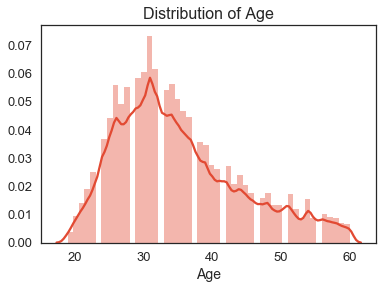

In [212]:
sns.distplot(df['age'])
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14);

**Interpretation:** Majority of the bike riders are between 25 years to 35 years old. People in higher age groups do not use bike rentals as much as the younger people.

Variable : age_group

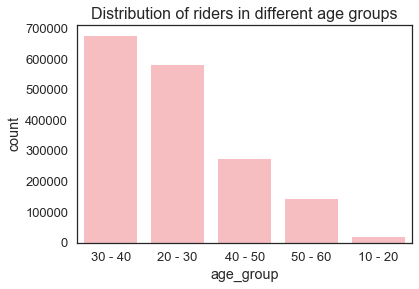

In [213]:
base_color = sns.color_palette()[6]
cat_order = df['age_group'].value_counts().index
sns.countplot(data = df, x = 'age_group', color = base_color, order = cat_order)
plt.title('Distribution of riders in different age groups', fontsize=16);

**Interpretation:** This bar-chart clearly shows that majority of the riders fall in the age group of 20 to 40 years old. The lower age group and the higher age groups have relatively fewer bike rentals.

Variable : user_type

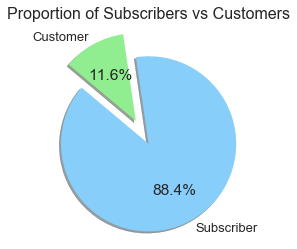

In [217]:
labels = "Subscriber", "Customer"
sizes = [np.sum(df['user_type'] == "Subscriber"), np.sum(df['user_type'] == "Customer")]
colors = ['lightskyblue','lightgreen']
explode = (0.3, 0.0,)  # explode 1st slice
plt.figure(figsize=(4,4))
# Plot
plt.title('Proportion of Subscribers vs Customers', fontsize=16)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

**Interpretation:** A large majority of the bike rentals are from subscribers who use the bikes to fulfill their conveyance needs.Subscribers accounted for 88.6$\%$ of total number of bike rides in 2018 while customers accounted for the remaining 11.4$\%$

<a id='q10'></a>
Varible: gender

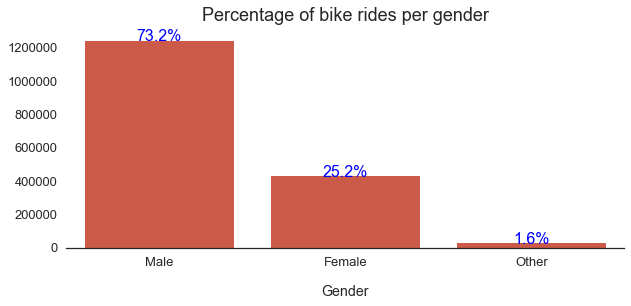

In [218]:
plt.figure(figsize=(10,4))
sns.set_style('white')

base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'member_gender', color = base_color)
sns.despine(left=True)

# add annotations
n_points = df.shape[0]
cat_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-15, pct_string, ha = 'center', color = 'b', fontsize=16)
    
plt.title('Percentage of bike rides per gender', fontsize=18, y=1.015)
plt.ylabel('', labelpad=16)
plt.xlabel('Gender', labelpad=16)
plt.xticks(rotation=360);

**Interpretation:** A large majority of the bike riders are male. My first thought was that maybe the design of the bike is not suitable for females. In order to dig deeper, I looked up the images of the bikes used on Google images. The bike design does not appear to be a problem. 

**Recommendation:** Ford GoBike should conduct a survey among the present female bike riders to understand which features of the bikes they find to be appealing and what changes the company should bring about in order to increase the usage of the bikes among female riders. 

**Now let's look at the usage pattern**

Variable: duration_min

In [214]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,age,age_group,start_time_year_month,hour,month,season,start_time_weekday,start_time_hour
760644,152,2018-06-10 15:04:22.102,2018-06-10 15:06:54.242,180,Telegraph Ave at 23rd St,37.812678,-122.268773,182,19th Street BART Station,37.809013,...,No,2.533333,26,20 - 30,2018-06,15,6,summer,Sun,15


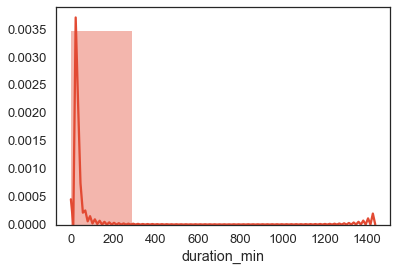

In [215]:
sns.distplot(df['duration_min'], bins=5);

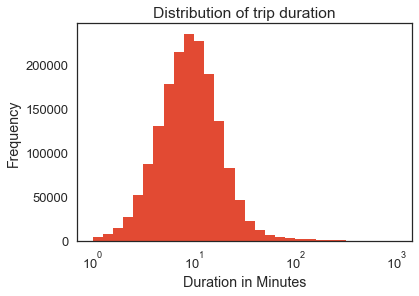

In [216]:
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of trip duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

**Interpretation:** As we can easily interpret from the above plot, the trip duration is around 10 minutes indicating that majority of the riders tend to rent a bike for short trips.

Variable: season

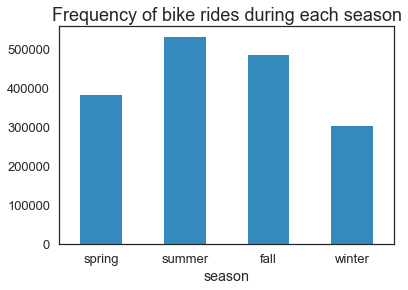

In [219]:
season_classes = ['spring', 'summer', 'fall', 'winter']
sclasses = pd.api.types.CategoricalDtype(ordered =True, categories = season_classes)
df['season'] = df['season'].astype(sclasses)


base_color = sns.color_palette()[1]
df.groupby('season')['bike_id'].count().plot(kind='bar',color=base_color)
plt.xticks(rotation = 360)
plt.title('Frequency of bike rides during each season', fontsize =18);

**Interpretation:** People prefer to ride more during summer and fall season when the weather is also conducive. Pollen allergies during spring season is quite common in these areas and that might be one reason for low number of bike rides during spring. Winters are also not preferred because of the cold and windy weather conditions. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The age variable had outliers, so I deleted those rows where age was greater than 60. 
Duration was skewed so we used logarithm transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data was very clean and did not require much work. But I did feature engineering to extract new variables from existing variables to facilitate further analysis. From member_birth_year, I created age variable which was used to create age_group variable. From start_time, we can extract all sort of variables for hour, month, season, day of week. These variables will prove to be very useful to explore the peak hours and days of higher number of bike rides.

## Bivariate Exploration of data

<a id='q1'></a>
### Analysis of the growth pattern in 2018

In [220]:
data = pd.DataFrame(df.groupby('start_time_year_month')['bike_id'].count())

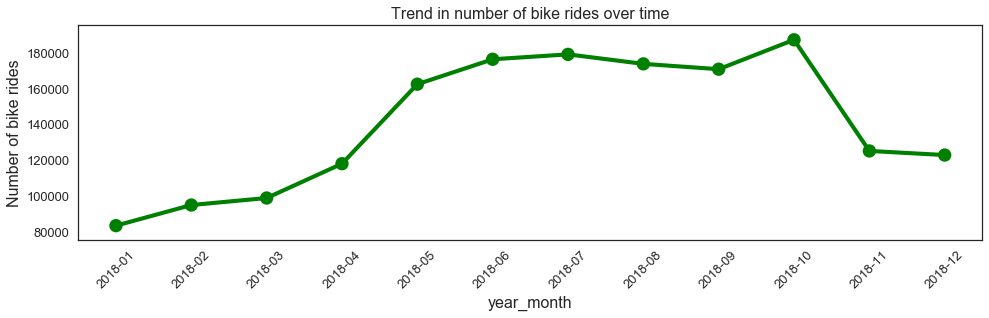

In [221]:
# rotating the labels on x=axis
# using index from groupby result to use as labels for x-axis
plt.figure(figsize=(14,4))
data['bike_id'].plot('line')
x = data.index
y = data['bike_id']
sns.pointplot(x=x, y=y, color='g')
plt.tight_layout()
plt.xlabel('year_month', fontsize=16)
plt.ylabel('Number of bike rides', fontsize =16)
plt.title('Trend in number of bike rides over time', fontsize=16)
plt.xticks(rotation =45);

<a id='q3'></a>
### The trend in number of trips by subscribers vs customers

In [222]:
monthly_user_type  = df.groupby(['start_time_year_month', 'user_type'])['bike_id'].count().reset_index()
monthly_user_type

,start_time_year_month,user_type,bike_id
0,2018-01,Customer,6189
1,2018-01,Subscriber,77582
2,2018-02,Customer,8624
3,2018-02,Subscriber,86663
4,2018-03,Customer,9271
5,2018-03,Subscriber,89934
6,2018-04,Customer,13759
7,2018-04,Subscriber,104603
8,2018-05,Customer,20253
9,2018-05,Subscriber,142492


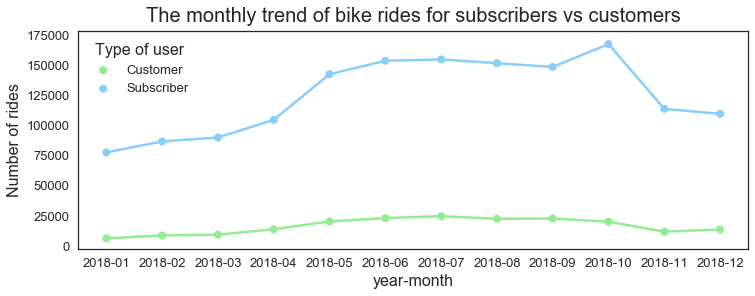

In [247]:
plt.figure(figsize=(12,4))
palette_colors = {'Subscriber': 'lightskyblue', 'Customer': 'lightgreen'}

ax = sns.pointplot(data=monthly_user_type, x='start_time_year_month', y='bike_id', hue='user_type', scale=.6, palette = palette_colors)
plt.title("The monthly trend of bike rides for subscribers vs customers", fontsize=20, y=1.015)
plt.xlabel('year-month', fontsize=16)
plt.ylabel('Number of rides', fontsize=16)
leg = ax.legend()
leg.set_title('Type of user',prop={'size':16})
ax = plt.gca();

**Interpretation** The number of bike rides have been higher for subscribers than customers throughout 2018. But if we compare the growth  on a month after month basis for each user type, customers growth is higher than subcribers growth. For example, number of bike rides for customers in Jan and Feb was 6189 and 8624 respectively, a growth rate of 39%. While number of bike rides for subscribers in Jan and Feb was 77582 and 86663 respectively, a growth rate of 12%

### Hourly trend of bike rides for males vs females

In [224]:
hourly_gender  = df.groupby(['hour', 'member_gender'])['bike_id'].count().reset_index()

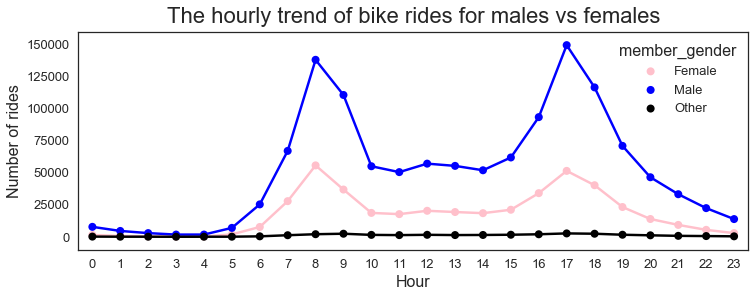

In [225]:
plt.figure(figsize=(12,4))
palette_colors = {'Male': 'blue', 'Female': 'pink', 'Other':'black'}

ax = sns.pointplot(data=hourly_gender, x='hour', y='bike_id', hue='member_gender', scale=.6, palette = palette_colors)
plt.title("The hourly trend of bike rides for males vs females", fontsize=22, y=1.015)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Number of rides', fontsize=16)
leg = ax.legend()
leg.set_title('member_gender',prop={'size':16})
ax = plt.gca();

**Interpretation** As seen in the univariate exploration of gender, the number of rides by males is greater than that of females. The above plot in addition shows that the hours during which both the genders ride the most are also same.

### Distribution of trip duration across gender and user_type

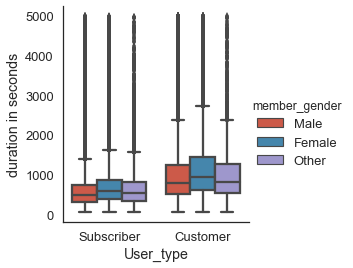

In [226]:
g = sns.factorplot(x="user_type", y="duration_sec", hue="member_gender", kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('User_type')
g.set_ylabels('duration in seconds')
plt.show()

**Interpretation:** As can be seen in the boxplot, trip duration for female customers is higher than male customers. Infact, this trend can be noticed in the female subscribers as well. Another point to note here is that trip duration for female customers is higher than female subscribers.

<a id='q5'></a>
### Average trip duration and average distance of subscribers vs customers

In [227]:
!pip install geopy

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [228]:
# trial run to see if geopy can calculate distance accurately
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print (geopy.distance.vincenty(coords_1, coords_2).km)

279.35290160386563


In [229]:
def distance(origin_lat, origin_long, destination_lat, destination_long):
    coords_1 = (origin_lat, origin_long)
    coords_2 = (destination_lat, destination_long)
    
    distance = geopy.distance.vincenty(coords_1, coords_2).miles
    return distance

In [230]:
df['distance_miles_estimates'] = df.apply(lambda x: distance(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [231]:
round(df.groupby('user_type')['distance_miles_estimates'].mean(),3)

user_type
Customer      1.085
Subscriber    0.982
Name: distance_miles_estimates, dtype: float64

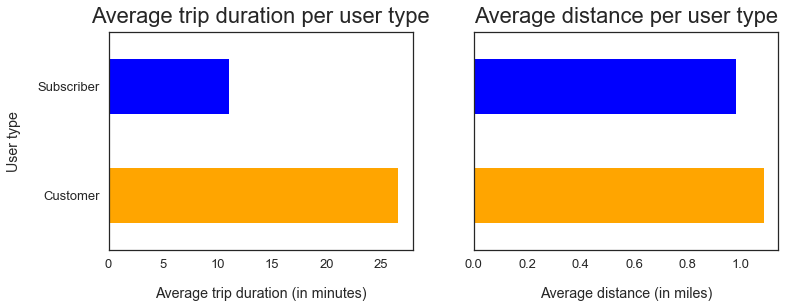

In [232]:
plt.subplot(1,2,1)

new_color=['orange', 'blue']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(12,4))
ax.set_title('Average trip duration per user type', fontsize=22, y=1.015)
ax.set_ylabel('User type', labelpad=16)
ax.set_xlabel('Average trip duration (in minutes)', labelpad=16);

plt.subplot(1,2,2)
new_color=['orange', 'blue']
ax = df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(12,4))
ax.set_title('Average distance per user type', fontsize=22, y=1.015)
ax.set_ylabel(' ')
ax.set_xlabel('Average distance (in miles)', labelpad=16)
ax.yaxis.set_visible(False);

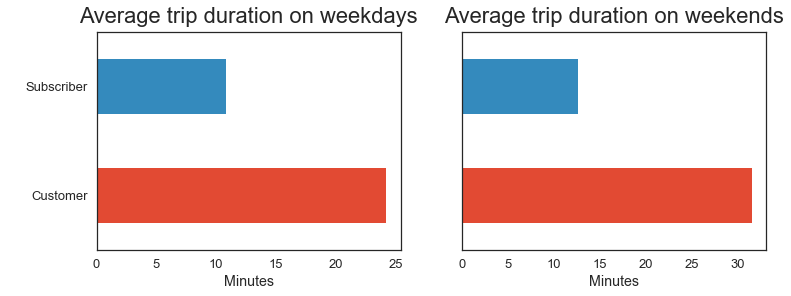

In [233]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# average distance on weekdays by each user type
df[~df['start_time_weekday'].isin(['Sat', 'Sun'])].groupby('user_type')['duration_min'].mean().plot(kind='barh')
plt.xticks(rotation =360);
plt.title('Average trip duration on weekdays', fontsize=22, y=1.015)
plt.xlabel("Minutes")
plt.ylabel(" ")

plt.subplot(1,2,2)
# average distance on weekends by each user type
ax = df[df['start_time_weekday'].isin(['Sat', 'Sun'])].groupby('user_type')['duration_min'].mean().plot(kind='barh')
plt.xticks(rotation =360)
plt.title('Average trip duration on weekends', fontsize=22, y=1.015)
plt.xlabel("Minutes")
ax.yaxis.set_visible(False);

**Interpretation** The average distance (in miles) is very similar for both the user types, but the average trip duration for customers (26 minutes) is more than two times the average trip duration for subscribers (11 minutes). The average trip duration traveled by customers is more than double that of subscribers irrespective of weekday or weekend

<a id='q6'></a>
### **Question: What is the trend in number of rides by subscribers across different age groups?**

In [234]:
level_order = ['10-20', '20-30', '30-40', '40-50', '50-60']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['age_group'] = df['age_group'].astype(ordered_cat)

In [235]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_year_month', 'age_group'])['bike_id'].count().reset_index()
subscriber_age_df.head()

,start_time_year_month,age_group,bike_id
0,2018-01,10 - 20,116
1,2018-01,20 - 30,19647
2,2018-01,30 - 40,34025
3,2018-01,40 - 50,15135
4,2018-01,50 - 60,8659


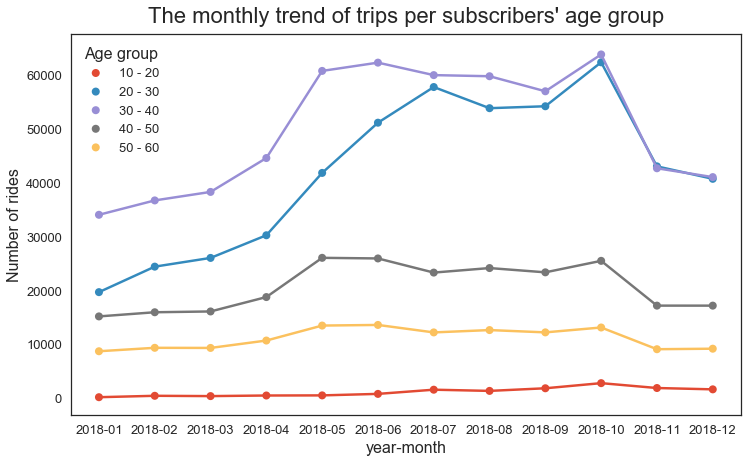

In [236]:
plt.figure(figsize=(12,7))
ax = sns.pointplot(data=subscriber_age_df, x='start_time_year_month', y='bike_id', hue='age_group', scale=.6)
plt.title("The monthly trend of trips per subscribers' age group", fontsize=22, y=1.015)
plt.xlabel('year-month', fontsize=16)
plt.ylabel('Number of rides', fontsize=16)
leg = ax.legend()
leg.set_title('Age group',prop={'size':16})
ax = plt.gca();

**Interpretation** The number of bike rides increase steadily for all the age groups till May. Between May and October, the highest growth happens for age group of 20-30 and 30-40. The remaining three groups have marginal increase between May and October. After October, the growth for all age groups tapers off. The weather plays a key role in this pattern. During the spring months and summer months, the number of rides increase. With the onset of autumn season, the number of rides start to decline gradually.

The top two age groups across the twelve month period are `20-30` and `30-40`. Customers in these age groups have consistently taken more number of rides than the other age groups.

<a id='q8'></a>
### **Question : Which age group has shown the maximum increase in percentage of rides each month?**

In [237]:
# Percentage of rides by age group per month
a = pd.DataFrame(df.groupby(['start_time_year_month', 'age_group'])['bike_id'].count().unstack())

round(a.div(a.sum(axis=1), axis=0),4)

age_group,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60
start_time_year_month,,,,,
2018-01,0.0026,0.2608,0.4383,0.1903,0.1080
2018-02,0.0050,0.2891,0.4227,0.1800,0.1032
2018-03,0.0048,0.2985,0.4234,0.1745,0.0988
2018-04,0.0064,0.2984,0.4226,0.1757,0.0968
2018-05,0.0048,0.3043,0.4233,0.1776,0.0899
2018-06,0.0074,0.3400,0.4047,0.1639,0.0839
2018-07,0.0130,0.3790,0.3847,0.1474,0.0761
2018-08,0.0121,0.3619,0.3916,0.1550,0.0795
2018-09,0.0137,0.3714,0.3832,0.1539,0.0777


The percentage of the number of the rides taken by age group of 20 to 30 years has grown significantly


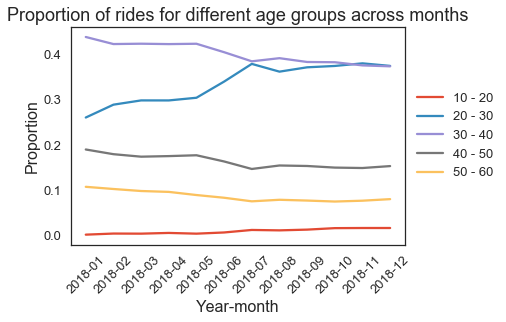

In [238]:
ax = plt.plot(a.div(a.sum(axis=1), axis=0))

plt.xticks(rotation = 45)
plt.xlabel('Year-month', fontsize=16)
plt.legend(a.columns, bbox_to_anchor = (1, 0.5), loc = 6)
plt.title('Proportion of rides for different age groups across months', fontsize=18)
plt.ylabel('Proportion', fontsize=16);

sol_string = ["The percentage of the number of the rides taken by age group of 20 to 30 years has grown significantly"]
print((" ").join(sol_string))

**Interpretation** The percentage of the number of the rides taken by age group of 20 to 30 years has grown significantly from 26% in Jan 2018 to 37% in Dec 2018 implying a growth of approximately 44% The trend shows decline for all the other age groups except the age group of 10 to 20 years where we see marginal increase.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The main objective was to understand the demographics of riders. We see that a large majority of the riders are subscribers in their 20's and 30's and are males. This is in line with my expectations. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The average distance and duration for customers is more than subscribers. One explanation could be that the customers use these bikes for leisure and pleasure and not for the conveyance to and from office like subscribers.


##  Multivariate Exploration of Data

<a id='q4'></a>
### **Analysis of number of rides for each user type during weekdays and weekends**

In [239]:
ct_counts = df[df['user_type']=='Subscriber'].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts = ct_counts[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]


In [240]:
ct_counts_customer = df[df['user_type']=='Customer'].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts_customer = ct_counts_customer[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

The usage pattern is distinctly different between the two user types as can be seen from these heatmaps.


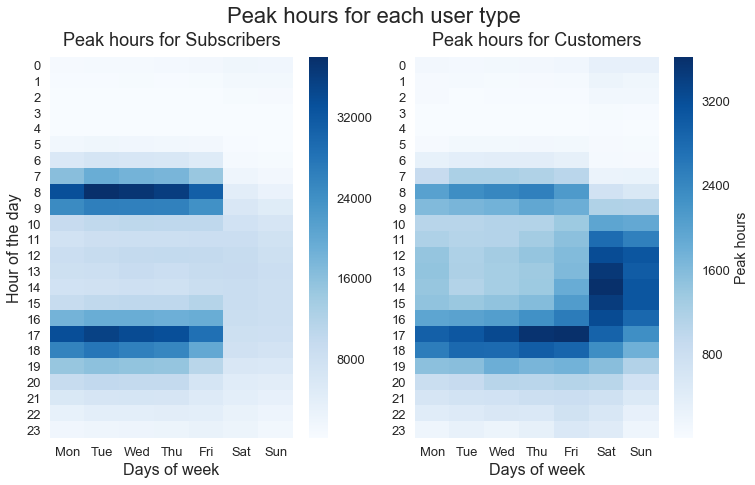

In [241]:
sol_string = ["The usage pattern is distinctly different between the two user types as can be seen from these heatmaps."]
print((" ").join(sol_string))

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.suptitle('Peak hours for each user type', fontsize=22)
sns.heatmap(ct_counts, cmap="Blues")
plt.title("Peak hours for Subscribers", y=1.015, fontsize = 18)
plt.xlabel('Days of week', fontsize=16)
plt.ylabel('Hour of the day', fontsize =16)
plt.yticks(rotation =360)

plt.subplot(1,2,2)
sns.heatmap(ct_counts_customer, cmap="Blues", cbar_kws={'label': 'Peak hours'})
plt.title("Peak hours for Customers", y=1.015, fontsize =18)
plt.xlabel('Days of week', fontsize=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

**Interpretation** Subscribers ride more during the hours of 7:00 am to 9:00 am and 16:00 pm - 19:00 pm on weekdays. Customers ride more during the hours of 16:00 pm and 19:00 pm. This coincides with the peak hours for traveling to and from office. The usage pattern is distinctly different between the two user types on weekends. Customers ride more during the hours of 10:00 am to 17:00 pm on weekends.One explanation could be people ride for leisure on weekends with their friends and loved ones to enjoy weekends.

<a id='q9'></a>
### Bike rentals analyzed by age group,day of week, hour of day

In [242]:
ct_counts_20_30 = df[(df['age_group']=='20 - 30') & (df['user_type']=='Subscriber')].groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].count().unstack()
ct_counts_20_30 = ct_counts_20_30[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

In [243]:
ct_counts_30_40 = df[(df['age_group']=='30 - 40')& (df['user_type']=='Subscriber')].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts_30_40 = ct_counts_30_40[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

In [244]:
ct_counts_40_50 = df[(df['age_group']=='40 - 50') & (df['user_type']=='Subscriber')].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts_40_50 = ct_counts_40_50[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

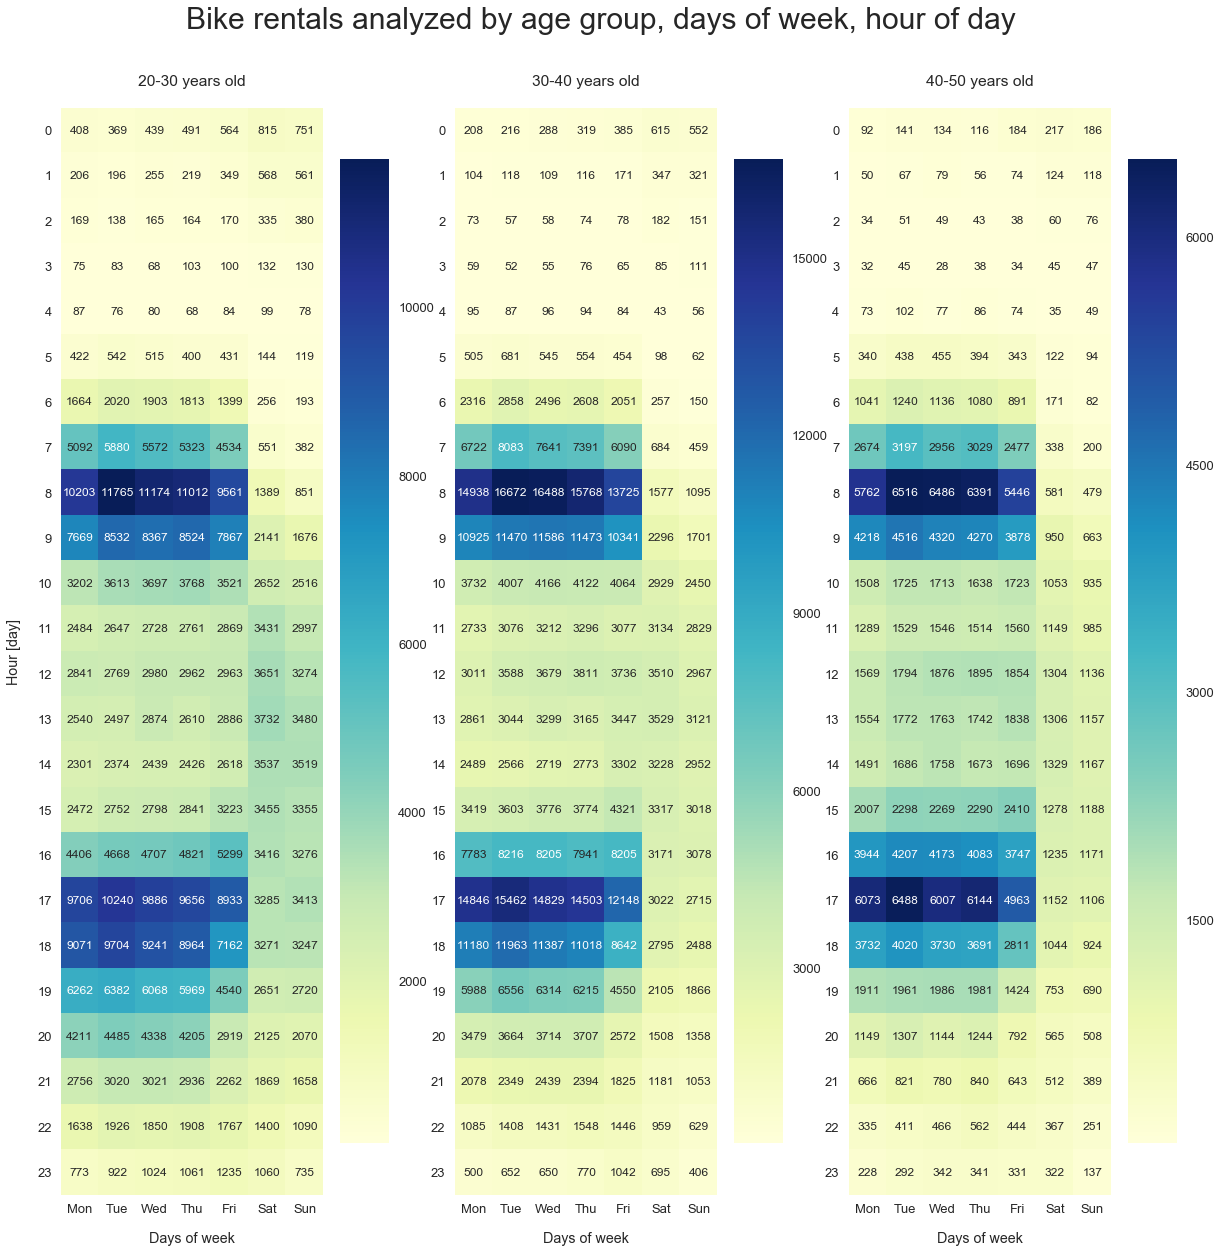

In [245]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.suptitle('Bike rentals analyzed by age group, days of week, hour of day', fontsize=30, y=0.95)
sns.heatmap(ct_counts_20_30, fmt='d', annot=True, cmap='YlGnBu', annot_kws={"size": 12})
plt.title("20-30 years old", y=1.015)
plt.xlabel('Days of week', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)

plt.subplot(1,3,2)
sns.heatmap(ct_counts_30_40, fmt='d', annot=True, cmap='YlGnBu', annot_kws={"size": 12})
plt.title("30-40 years old", y=1.015)
plt.xlabel('Days of week', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)

plt.subplot(1,3,3)
sns.heatmap(ct_counts_40_50, fmt='d', annot=True, cmap='YlGnBu', annot_kws={"size": 12})
plt.title("40-50 years old", y=1.015)
plt.xlabel('Days of week', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

**Interpretation** The peak hours are same across the three age groups. In the evening, the only noticable difference is that the number of bike rentals is relatively high for 20-30 years old during the hour of 20:00 pm as compared to other two age groups. This is a younger age group with higher energy. As people age they tend to have lower energy by the end of the day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of trips deeper and looked at peak hours, weekdays vs weekends, subscribers vs customers, and age group. 

### Were there any interesting or surprising interactions between features?

The usage pattern is distinctly different between the two user types on weekends. Customers ride more during the hours of 10:00 am to 17:00 pm on weekends.One explanation could be people ride for leisure on weekends with their friends and loved ones to enjoy weekends.

The peak hours are same across the three age groups on weekdays. In the evening, the only noticable difference is that the number of bike rentals is relatively high for 20-30 years old during the hour of 20:00 pm as compared to other two age groups. This is a younger age group with higher energy. As people age they tend to have lower energy by the end of the day.


<a id='conclusions'></a>
## Conclusions

1. Subscribers who have paid the membership use the bikes frequently mostly on weekdays during the peak travel hours for office conveyance. 

2. Current subscriber base has more males than females. We saw that the hours of rides are same across both the genders. But the duration is more for female subscribers as well as female customers.

3. People in their 20's and 30's take more trips than other age groups.


<a id='recommendations'></a>
## Recommendations

A list of recommendations, as identified through this analysis are listed below.

1. Increasing trips in the lower age groups is comparatively easier. The company should offer discounts such as students discounts to riders in the age group of 10 to 20 so as to boost the number of trips taken by riders in this age group. The company can potentially offer free rides to students so as to create a future base of subscribers when these students enter the age group of upper 20's. 

2. Offer discounted price / package during weekends to boost ridership.

3. As seen, ridership typically goes up during the summer months. The company should look into lowering the rates for non-peak hours / months which will incentivize customers to ride more and create some stream of revenue generation. 

4. Customers who ride regularly during rush hour can be offered packages to incentivize them to turn into annual subscribers. Customers, who ride under 30 minutes are likely to become 'Subscribers' by opting for annual subscription instead of pay per trip option. This would be segment to target, by way of offering special introductory annual subscription price for first time subscribers.

5. Ford Go Bike should survey current female riders in order to understand which features are liked and disliked by them so that the company can address their concerns and offer customized bikes so as to increase the number of trips by females.

6. Adding stations in university campuses so that the students can use these bikes for commuting within the campus on a regular basis is another lucrative way to attract new future subscribers.

7. Company should allocate considerable marketing budget for digital marketing through social media platforms to increase the number of subscribers.